In [34]:
import pandas as pd
import numpy as np

In [35]:
pip install pingouin

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/KennethJiang1213/NYU_Integrated_Marketing/main/TSLA.O.csv')
df=df.dropna()
df.head()

,Date,Close,PE(TTM),PB(MRQ),PS(TTM)
0,2010/6/29,4.778,-32.124306,-7.964222,19.883823
1,2010/6/30,4.766,-32.043625,-7.944220,19.833885
2,2010/7/1,4.392,-29.529083,-7.320817,18.277470
3,2010/7/2,3.840,-25.817778,-6.400714,15.980302
4,2010/7/6,3.222,-21.662729,-5.370599,13.408472


In [37]:
df.columns

Index(['Date', 'Close', 'PE(TTM)', 'PB(MRQ)', 'PS(TTM)'], dtype='object')

# Regression

## Scatterplot
https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [38]:
#install the package
import seaborn as sns

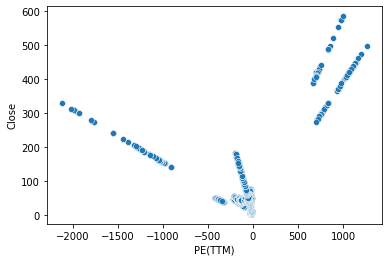

In [39]:
x='PE(TTM)'
y='Close'
sns.scatterplot(data=df, x=x, y=y)

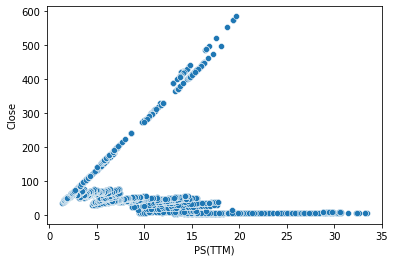

In [40]:
x='PS(TTM)'
y='Close'
sns.scatterplot(data=df, x=x, y=y)

### Regression Result
https://www.statsmodels.org/stable/regression.html

In [41]:
import statsmodels.api as sm

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2714 entries, 0 to 2713
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2714 non-null   object 
 1   Close    2714 non-null   float64
 2   PE(TTM)  2714 non-null   float64
 3   PB(MRQ)  2714 non-null   float64
 4   PS(TTM)  2714 non-null   float64
dtypes: float64(4), object(1)
memory usage: 127.2+ KB


In [43]:
# define the dependent and independent variables
X=df[['PE(TTM)','PS(TTM)']]
y=df['Close']


In [44]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,PE(TTM),PS(TTM)
0,1.0,-32.124306,19.883823
1,1.0,-32.043625,19.833885
2,1.0,-29.529083,18.277470
3,1.0,-25.817778,15.980302
4,1.0,-21.662729,13.408472


In [45]:
# conduct regression
model = sm.OLS(y, X).fit()

In [46]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     236.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           1.54e-95
Time:                        12:14:43   Log-Likelihood:                -15767.
No. Observations:                2714   AIC:                         3.154e+04
Df Residuals:                    2711   BIC:                         3.156e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.1988      3.026     31.464      0.0

### Check assumptions

In [47]:
### get the residuals
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,-36.562461,41.340461
1,-36.709726,41.475726
2,-41.299509,45.691509
3,-48.073730,51.913730
4,-55.657915,58.879915


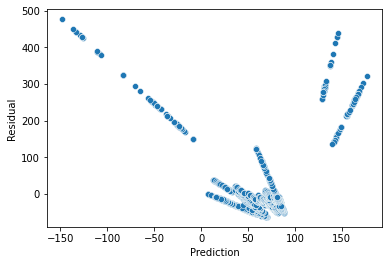

In [48]:
#print the scatter plot between residuals and predicitions
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

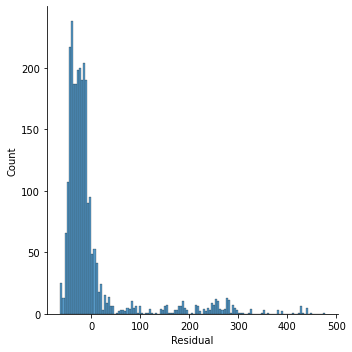

In [49]:
# histogram of the residual
sns.displot(df_res, x="Residual")

In [50]:
x=df_res['Residual']
pg.normality(x)

NameError: ignored

In [51]:
pg.pairwise_corr(df,columns=['PE(TTM)','PS(TTM)'], method='pearson').round(3)

NameError: ignored